

# Introduction to Pandas

![pandas Logo](https://github.com/pandas-dev/pandas/raw/master/web/pandas/static/img/pandas.svg "pandas Logo")

## Questions
1. What are the important pandas data structures?
1. How do I interact with these?
1. What else can pandas do for me?

In [1]:
import pandas as pd

## The pandas [`DataFrame`](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe)...
... is a **labeled**, two dimensional columnal structure similar to a table, spreadsheet, or the R `data.frame`.

![dataframe schematic](https://github.com/pandas-dev/pandas/raw/master/doc/source/_static/schemas/01_table_dataframe.svg "Schematic of a pandas DataFrame")

The `columns` that make up our `DataFrame` can be lists, dictionaries, NumPy arrays, pandas `Series`, or more. Within these `columns` our data can be any texts, numbers, dates and times, or many other data types you may have encountered in Python and NumPy. Shown here on the left in dark gray, our very first `column`  is uniquely referrred to as an `Index`, and this contains information characterizing each row of our `DataFrame`. Similar to any other `column`, the `index` can label our rows by text, numbers, `datetime`s (a popular one!), or more.

Let's take a look by reading in some `.csv` data [[ref](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/)].

In [2]:
df = pd.read_csv('enso_data.csv')

df

,datetime,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
0,1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1,1982-02-01,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02
2,1982-03-01,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02
3,1982-04-01,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24
4,1982-05-01,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69
...,...,...,...,...,...,...,...,...,...
467,2020-12-01,22.16,-0.60,24.38,-0.83,27.65,-0.95,25.53,-1.12
468,2021-01-01,23.89,-0.64,25.06,-0.55,27.10,-1.25,25.58,-0.99
469,2021-02-01,25.55,-0.66,25.80,-0.57,27.20,-1.00,25.81,-0.92
470,2021-03-01,26.48,-0.26,26.80,-0.39,27.79,-0.55,26.75,-0.51


In [3]:
df.index

RangeIndex(start=0, stop=472, step=1)

Our indexing column isn't particularly helpful currently. pandas is clever! A few optional keyword arguments later, and...

In [4]:
df = pd.read_csv('enso_data.csv', index_col=0, parse_dates=True)

df

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1982-02-01,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02
1982-03-01,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02
1982-04-01,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24
1982-05-01,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69
...,...,...,...,...,...,...,...,...
2020-12-01,22.16,-0.60,24.38,-0.83,27.65,-0.95,25.53,-1.12
2021-01-01,23.89,-0.64,25.06,-0.55,27.10,-1.25,25.58,-0.99
2021-02-01,25.55,-0.66,25.80,-0.57,27.20,-1.00,25.81,-0.92


In [5]:
df.index

DatetimeIndex(['1982-01-01', '1982-02-01', '1982-03-01', '1982-04-01',
               '1982-05-01', '1982-06-01', '1982-07-01', '1982-08-01',
               '1982-09-01', '1982-10-01',
               ...
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01', '2021-01-01', '2021-02-01',
               '2021-03-01', '2021-04-01'],
              dtype='datetime64[ns]', name='datetime', length=472, freq=None)

... now we have our data helpfully organized by a proper `datetime`-like object. Each of our multiple columns of data can now be referenced by their date! This sneak preview at the pandas `DatetimeIndex` also unlocks for us much of pandas most useful time series functionality. Don't worry, we'll get there. What are the actual columns of data we've read in here?

In [6]:
df.columns

Index(['Nino12', 'Nino12anom', 'Nino3', 'Nino3anom', 'Nino4', 'Nino4anom',
       'Nino34', 'Nino34anom'],
      dtype='object')

## The pandas [`Series`](https://pandas.pydata.org/docs/user_guide/dsintro.html#series)...

... is essentially any one of the columns of our `DataFrame`, with its accompanying `Index` to provide a label for each value in our column.

![pandas Series](https://github.com/pandas-dev/pandas/raw/master/doc/source/_static/schemas/01_table_series.svg "Schematic of a pandas Series")

The pandas `Series` is a fast and capable 1-dimensional array of nearly any data type we could want, and it can behave very similarly to a NumPy `ndarray` or a Python `dict`. You can take a look at any of the `Series` that make up your `DataFrame` with its label and the Python `dict` notation, or with dot-shorthand:

In [7]:
df["Nino34"]

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
              ...  
2020-12-01    25.53
2021-01-01    25.58
2021-02-01    25.81
2021-03-01    26.75
2021-04-01    27.40
Name: Nino34, Length: 472, dtype: float64

In [8]:
df.Nino34

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
              ...  
2020-12-01    25.53
2021-01-01    25.58
2021-02-01    25.81
2021-03-01    26.75
2021-04-01    27.40
Name: Nino34, Length: 472, dtype: float64

## Investigating the `DataFrame` and `Series`

We will expand on what you just saw, soon! Importantly,

> **Everything in pandas can be accessed with its label**,

no matter how your data is organized.

Let's back up a bit here. Once more, let's pull out one `Series` from our `DataFrame` using its column label, and we'll start there.

In [ ]:
nino34_series = df["Nino34"]

nino34_series

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
              ...  
2020-12-01    25.53
2021-01-01    25.58
2021-02-01    25.81
2021-03-01    26.75
2021-04-01    27.40
Name: Nino34, Length: 472, dtype: float64

`Series` can be indexed, selected, and subset as both `ndarray`-like,

In [ ]:
nino34_series[3]

28.02

and `dict`-like, using labels

In [ ]:
nino34_series["1982-04-01"]

28.02

and these can be extended in both ways you might expect and ways you might not:

In [ ]:
# numpy-like interval slices
nino34_series[0:12]

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
1982-06-01    28.75
1982-07-01    28.10
1982-08-01    27.93
1982-09-01    28.11
1982-10-01    28.64
1982-11-01    28.81
1982-12-01    29.21
Name: Nino34, dtype: float64

In [ ]:
# label-based slicing
nino34_series["1982-01-01":"1982-12-01"]

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
1982-06-01    28.75
1982-07-01    28.10
1982-08-01    27.93
1982-09-01    28.11
1982-10-01    28.64
1982-11-01    28.81
1982-12-01    29.21
Name: Nino34, dtype: float64

In [16]:
# another way of slicing - you might recognize this from xarray
nino34_series[slice("1982-01-01","1982-12-01")]

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
1982-06-01    28.75
1982-07-01    28.10
1982-08-01    27.93
1982-09-01    28.11
1982-10-01    28.64
1982-11-01    28.81
1982-12-01    29.21
Name: Nino34, dtype: float64

Importantly, label-based slices are **inclusive** of the final value, unlike usual Python indexing rules.

Let's introduce pandas-preferred ways to access your data by label, `.loc`, or by index, `.iloc`. They behave similarly to the notation introduced above, but provide more speed, security, and rigor in your value selection, as well as help you avoid [chained assignment warnings](https://pandas.pydata.org/docs/user_guide/indexing.html#returning-a-view-versus-a-copy) within pandas.

In [14]:
nino34_series.iloc[3]

28.02

In [15]:
nino34_series.iloc[0:12]

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
1982-06-01    28.75
1982-07-01    28.10
1982-08-01    27.93
1982-09-01    28.11
1982-10-01    28.64
1982-11-01    28.81
1982-12-01    29.21
Name: Nino34, dtype: float64

In [16]:
nino34_series.loc["1982-04-01"]

28.02

In [17]:
nino34_series.loc["1982-01-01":"1982-12-01"]

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
1982-06-01    28.75
1982-07-01    28.10
1982-08-01    27.93
1982-09-01    28.11
1982-10-01    28.64
1982-11-01    28.81
1982-12-01    29.21
Name: Nino34, dtype: float64

These capabilities extend back to our original `DataFrame`, as well! There are apparent limitations of the `dict` label notation, e.g.

In [18]:
df["1982-01-01"]

KeyError: '1982-01-01'

and

In [19]:
df[0]

KeyError: 0

won't work. By default, this notation allows us to pull out any of our columns as their own series, as we demonstrated before.

In [20]:
df["Nino34"]

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
              ...  
2020-12-01    25.53
2021-01-01    25.58
2021-02-01    25.81
2021-03-01    26.75
2021-04-01    27.40
Name: Nino34, Length: 472, dtype: float64

With this plus our knowledge of the `Series` `df["Nino34"]` gives us, we can chain our brackets to pull out any value from any of our columns in `df`.

In [21]:
df["Nino34"]["1982-04-01"]  # selecting the Series, then selecting a label within

28.02

In [22]:
df["Nino34"][3]

28.02

However, this is not a pandas-preferred way to index and subset our data, and has limited capabilities for us. As we touched on before, `.loc` and `.iloc` give us more to work with, and their functionality grows further for `df`.

In [23]:
df.loc["1982-04-01", "Nino34"]  # note [<row>, <column>] ordering

28.02

These allow us to pull out entire rows of `df`,

In [24]:
df.loc["1982-04-01"]

Nino12        24.50
Nino12anom    -0.97
Nino3         27.68
Nino3anom      0.18
Nino4         28.92
Nino4anom      0.42
Nino34        28.02
Nino34anom     0.24
Name: 1982-04-01 00:00:00, dtype: float64

In [25]:
df.loc["1982-01-01":"1982-12-01"]

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1982-02-01,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02
1982-03-01,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02
1982-04-01,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24
1982-05-01,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69
1982-06-01,22.89,0.07,27.46,1.03,29.76,0.92,28.75,1.10
1982-07-01,22.47,0.87,26.44,0.82,29.38,0.58,28.10,0.88
1982-08-01,21.75,1.10,26.15,1.16,29.04,0.36,27.93,1.11
1982-09-01,21.80,1.44,26.52,1.67,29.16,0.47,28.11,1.39


In [26]:
df.iloc[3]

Nino12        24.50
Nino12anom    -0.97
Nino3         27.68
Nino3anom      0.18
Nino4         28.92
Nino4anom      0.42
Nino34        28.02
Nino34anom     0.24
Name: 1982-04-01 00:00:00, dtype: float64

In [27]:
df.iloc[0:12]

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1982-02-01,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02
1982-03-01,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02
1982-04-01,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24
1982-05-01,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69
1982-06-01,22.89,0.07,27.46,1.03,29.76,0.92,28.75,1.10
1982-07-01,22.47,0.87,26.44,0.82,29.38,0.58,28.10,0.88
1982-08-01,21.75,1.10,26.15,1.16,29.04,0.36,27.93,1.11
1982-09-01,21.80,1.44,26.52,1.67,29.16,0.47,28.11,1.39


Even further,

In [28]:
df.loc[
    "1982-01-01":"1982-12-01",              # slice of rows
    ["Nino12", "Nino3", "Nino4", "Nino34"]  # list of columns
]

,Nino12,Nino3,Nino4,Nino34
datetime,,,,
1982-01-01,24.29,25.87,28.30,26.72
1982-02-01,25.49,26.38,28.21,26.70
1982-03-01,25.21,26.98,28.41,27.20
1982-04-01,24.50,27.68,28.92,28.02
1982-05-01,23.97,27.79,29.49,28.54
1982-06-01,22.89,27.46,29.76,28.75
1982-07-01,22.47,26.44,29.38,28.10
1982-08-01,21.75,26.15,29.04,27.93
1982-09-01,21.80,26.52,29.16,28.11


We strongly suggest taking a look at some of pandas [rules for indexing](https://pandas.pydata.org/docs/user_guide/indexing.html#), where they demonstrate these further, discuss the limitations, and compare interacting with a `DataFrame` versus a `Series`. Pandas also gives you a few shortcuts to quickly investigate entire `DataFrame`s.

In [29]:
df.head()

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1982-02-01,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02
1982-03-01,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02
1982-04-01,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24
1982-05-01,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69


In [30]:
df.tail()

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
2020-12-01,22.16,-0.60,24.38,-0.83,27.65,-0.95,25.53,-1.12
2021-01-01,23.89,-0.64,25.06,-0.55,27.10,-1.25,25.58,-0.99
2021-02-01,25.55,-0.66,25.80,-0.57,27.20,-1.00,25.81,-0.92
2021-03-01,26.48,-0.26,26.80,-0.39,27.79,-0.55,26.75,-0.51
2021-04-01,24.89,-0.80,26.96,-0.65,28.47,-0.21,27.40,-0.49


## The Powers of pandas

### Quick Plots of Your Data
A good way to explore your data is by making a simple plot. Pandas allows you to plot without even calling `matplotlib`! Here, we are interested in the `Nino34` series. Check this out...

<<<<<<< local


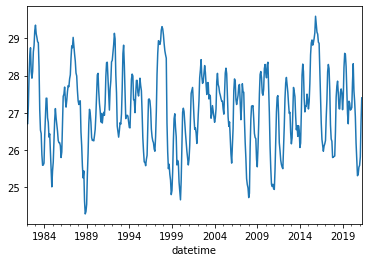

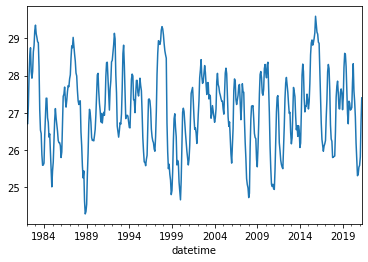

>>>>>>> remote


In [31]:
df.Nino34.plot();

This can be a great way to take a quick look at your data, but what if you wanted a more ***quantatative*** perspective? Pandas has some handy funtionality for that too!

### Statistics

By using the `.describe` method, we see some general statistics! Notice how calling this on the dataframe returns a table with all the series

In [32]:
df.describe()

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
count,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000,472.000000
mean,23.209619,0.059725,25.936568,0.039428,28.625064,0.063814,27.076780,0.034894
std,2.431522,1.157590,1.349621,0.965464,0.755422,0.709401,1.063004,0.947936
min,18.570000,-2.100000,23.030000,-2.070000,26.430000,-1.870000,24.270000,-2.380000
25%,21.152500,-0.712500,24.850000,-0.600000,28.140000,-0.430000,26.330000,-0.572500
50%,22.980000,-0.160000,25.885000,-0.115000,28.760000,0.205000,27.100000,0.015000
75%,25.322500,0.515000,26.962500,0.512500,29.190000,0.630000,27.792500,0.565000
max,29.150000,4.620000,29.140000,3.620000,30.300000,1.670000,29.600000,2.950000


You can look at specific statistics too, such as mean! Notice how the output is a series (column) now

In [33]:
df.mean()

Nino12        23.209619
Nino12anom     0.059725
Nino3         25.936568
Nino3anom      0.039428
Nino4         28.625064
Nino4anom      0.063814
Nino34        27.076780
Nino34anom     0.034894
dtype: float64

If you are interested in a single column mean, subset for that and use `.mean`

In [34]:
df.Nino34.mean()

27.07677966101695

### Other Neat Plotting Functionality
Before, we called `.plot()` which generated a single line plot. This is helpful, but there are other plots which can also help with understanding your data! Let's try using a histogram to understand distributions...

The only part that changes here is we are subsetting for just two `Nino` indices, and after `.plot`, we include `.hist()` which stands for histogram

<<<<<<< local


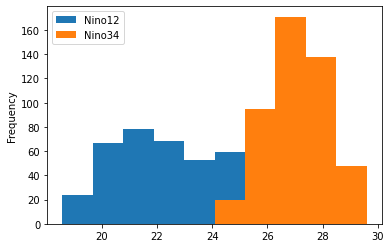

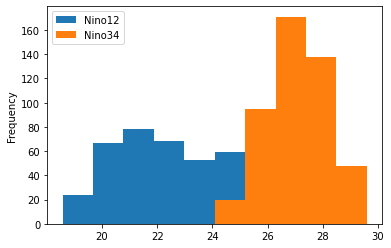

>>>>>>> remote


In [35]:
df[['Nino12', 'Nino34']].plot.hist();

We can see some clear differences in the distributions, which is helpful! Another plot one might like to use would be a `boxplot`. Here, we replace `hist` with `box`

<<<<<<< local


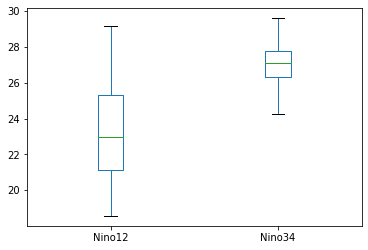

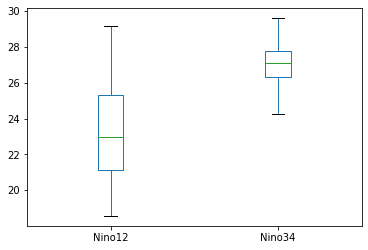

>>>>>>> remote


In [36]:
df[['Nino12', 'Nino34']].plot.box();

Here, we again see a clear difference in the distributions. These are not the only plots you can use within pandas! For more examples of plotting choices, check out [the pandas plot documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### Advanced subsetting

You may be interested in subsetting beyond slices - here, we provide examples of using a couple other options.

Say you only want the month of January - you can use `df.index.month` to query for which month you are interested in (in this case, 1 for the month of January)

In [37]:
# Uses the datetime column
df[df.index.month == 1]

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom
datetime,,,,,,,,
1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15
1983-01-01,27.42,2.96,28.92,3.29,29.00,0.70,29.36,2.79
1984-01-01,24.18,-0.28,24.82,-0.81,27.64,-0.66,25.64,-0.93
1985-01-01,23.59,-0.87,24.51,-1.12,27.71,-0.59,25.43,-1.14
1986-01-01,24.61,0.15,24.73,-0.90,28.11,-0.19,25.79,-0.78
1987-01-01,25.30,0.84,26.69,1.06,29.02,0.72,27.91,1.34
1988-01-01,24.64,0.18,26.12,0.49,29.13,0.83,27.32,0.75
1989-01-01,24.09,-0.37,24.15,-1.48,26.54,-1.76,24.53,-2.04
1990-01-01,24.02,-0.44,25.34,-0.29,28.56,0.26,26.55,-0.02


You could even assign this month to a new column!

In [38]:
df['month'] = df.index.month

Now that it is its own column (series), we can use groupby to group by the month, then taking the average, to determine average monthly values over the dataset

<<<<<<< local


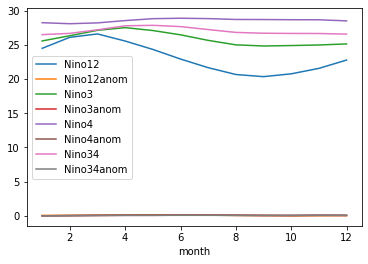

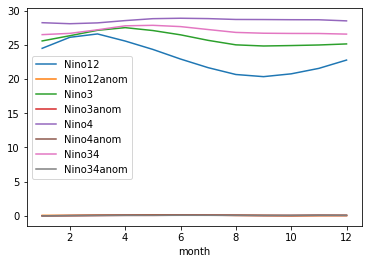

>>>>>>> remote


In [39]:
df.groupby('month').mean().plot();

You can also use conditional indexing, such that you can search where rows meet a certain criteria. In this case, we are interested where the Nino34 anomaly is greater than 2

In [40]:
df[df.Nino34anom > 2]

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom,month
datetime,,,,,,,,,
1982-11-01,24.59,3.00,27.62,2.64,29.23,0.60,28.81,2.16,11
1982-12-01,26.13,3.34,28.39,3.25,29.15,0.66,29.21,2.64,12
1983-01-01,27.42,2.96,28.92,3.29,29.00,0.70,29.36,2.79,1
1983-02-01,28.09,2.02,28.92,2.55,28.79,0.69,29.13,2.41,2
1997-08-01,24.80,4.15,27.84,2.85,29.26,0.58,28.84,2.02,8
1997-09-01,24.40,4.04,27.84,2.99,29.32,0.63,28.93,2.21,9
1997-10-01,24.58,3.76,28.17,3.25,29.32,0.66,29.23,2.54,10
1997-11-01,25.63,4.04,28.55,3.57,29.49,0.86,29.32,2.67,11
1997-12-01,26.92,4.13,28.76,3.62,29.32,0.83,29.26,2.69,12


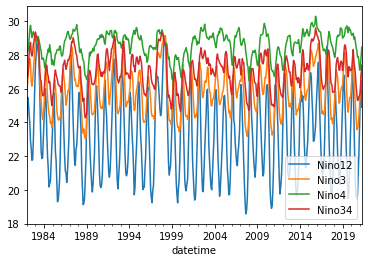

In [42]:
<<<<<<< LOCAL CELL DELETED >>>>>>>
df[nino_temp_cols].plot();

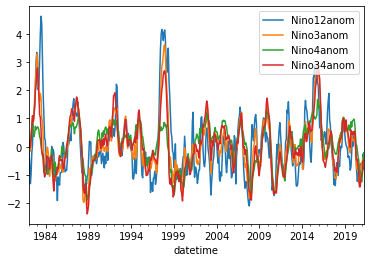

In [43]:
<<<<<<< LOCAL CELL DELETED >>>>>>>
df[nino_anom_cols].plot();

### Resampling

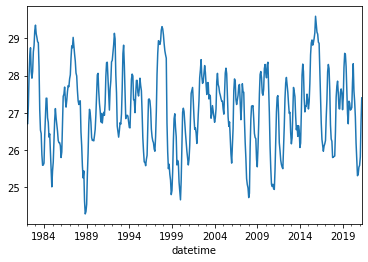

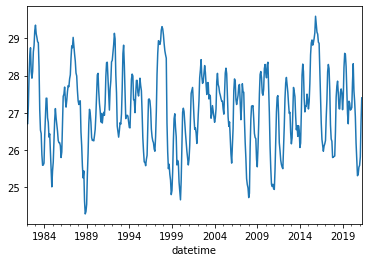

In [ ]:
df.Nino34.plot();

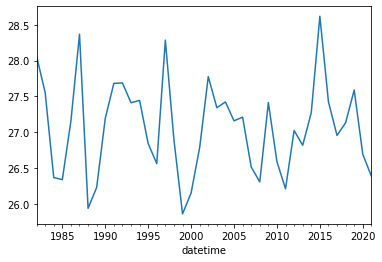

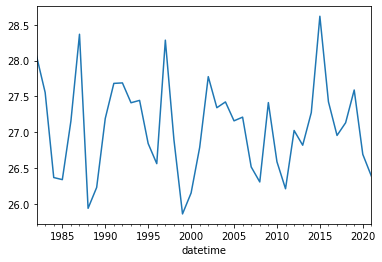

In [ ]:
df.Nino34.resample('1Y').mean().plot();

### Applying operations to a dataframe

Often times, people are interested in applying calculations to data within pandas dataframes. Here, we setup a function to convert from degrees Celsius to Kelvin

In [ ]:
def convert_degc_to_kelvin(temperature_degc):
    """
    Converts from degrees celsius to Kelvin
    """
    
    return temperature_degc + 273.15

Now, this function works a single value

In [ ]:
# Convert a single value
convert_degc_to_kelvin(0)

273.15

But what if we want to apply this to our dataframe? We can subset for Nino34, which is in degrees Celsius

In [48]:
nino34_series

datetime
1982-01-01    26.72
1982-02-01    26.70
1982-03-01    27.20
1982-04-01    28.02
1982-05-01    28.54
              ...  
2020-12-01    25.53
2021-01-01    25.58
2021-02-01    25.81
2021-03-01    26.75
2021-04-01    27.40
Name: Nino34, Length: 472, dtype: float64

Notice how the object type is a pandas series

In [ ]:
type(df.Nino12[0:10])

pandas.core.series.Series

If you call `.values`, the object type is now a numpy array. Pandas series values include numpy arrays, and calling `.values` returns the series as a numpy array!

In [ ]:
type(df.Nino12.values[0:10])

numpy.ndarray

Let's apply this calculation to our pandas series, which returns a pandas series

In [ ]:
convert_degc_to_kelvin(nino34_series)

datetime
1982-01-01    299.87
1982-02-01    299.85
1982-03-01    300.35
1982-04-01    301.17
1982-05-01    301.69
               ...  
2020-12-01    298.68
2021-01-01    298.73
2021-02-01    298.96
2021-03-01    299.90
2021-04-01    300.55
Name: Nino34, Length: 472, dtype: float64

If we include `.values`, it returns a `numpy array`

In [ ]:
convert_degc_to_kelvin(nino34_series.values)

array([299.87, 299.85, 300.35, 301.17, 301.69, 301.9 , 301.25, 301.08,
       301.26, 301.79, 301.96, 302.36, 302.51, 302.28, 302.18, 302.06,
       302.04, 301.39, 300.22, 299.68, 299.59, 299.02, 298.73, 298.74,
       298.79, 299.54, 300.01, 300.54, 300.54, 300.01, 299.89, 299.49,
       299.58, 299.08, 298.56, 298.15, 298.58, 298.82, 299.38, 299.95,
       300.26, 300.01, 299.84, 299.65, 299.4 , 299.34, 299.34, 299.26,
       298.94, 299.09, 299.8 , 300.59, 300.65, 300.84, 300.52, 300.3 ,
       300.48, 300.72, 300.88, 300.85, 301.06, 301.17, 301.62, 301.95,
       301.9 , 302.18, 301.95, 301.73, 301.54, 301.22, 301.14, 300.75,
       300.47, 300.37, 300.46, 300.47, 299.63, 299.26, 298.72, 298.39,
       298.58, 297.77, 297.42, 297.48, 297.68, 298.48, 299.05, 299.84,
       300.24, 300.13, 299.89, 299.48, 299.4 , 299.41, 299.39, 299.53,
       299.7 , 300.1 , 300.61, 301.17, 301.21, 300.73, 300.4 , 300.2 ,
       299.9 , 300.13, 299.87, 300.06, 300.16, 300.08, 300.4 , 301.13,
      

We can now assign our `pandas series` with the converted temperatures to a new column in our dataframe!

In [ ]:
df['Nino34_degK'] = convert_degc_to_kelvin(nino34_series)

In [ ]:
df.Nino34_degK

datetime
1982-01-01    299.87
1982-02-01    299.85
1982-03-01    300.35
1982-04-01    301.17
1982-05-01    301.69
               ...  
2020-12-01    298.68
2021-01-01    298.73
2021-02-01    298.96
2021-03-01    299.90
2021-04-01    300.55
Name: Nino34_degK, Length: 472, dtype: float64

Notice how the name of our variable now matches the calculation

Now that our analysis is done, we can save our data to a `csv` for later - or share with others!

In [ ]:
df.to_csv('nino_analyzed_output.csv')

In [ ]:
pd.read_csv('nino_analyzed_output.csv', index_col=0, parse_dates=True)

,Nino12,Nino12anom,Nino3,Nino3anom,Nino4,Nino4anom,Nino34,Nino34anom,month,Nino34_degK
datetime,,,,,,,,,,
1982-01-01,24.29,-0.17,25.87,0.24,28.30,0.00,26.72,0.15,1,299.87
1982-02-01,25.49,-0.58,26.38,0.01,28.21,0.11,26.70,-0.02,2,299.85
1982-03-01,25.21,-1.31,26.98,-0.16,28.41,0.22,27.20,-0.02,3,300.35
1982-04-01,24.50,-0.97,27.68,0.18,28.92,0.42,28.02,0.24,4,301.17
1982-05-01,23.97,-0.23,27.79,0.71,29.49,0.70,28.54,0.69,5,301.69
...,...,...,...,...,...,...,...,...,...,...
2020-12-01,22.16,-0.60,24.38,-0.83,27.65,-0.95,25.53,-1.12,12,298.68
2021-01-01,23.89,-0.64,25.06,-0.55,27.10,-1.25,25.58,-0.99,1,298.73
2021-02-01,25.55,-0.66,25.80,-0.57,27.20,-1.00,25.81,-0.92,2,298.96
